In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt

Load the data 

In [3]:
data=pd.read_csv('03_firstExam_data_english_v1.1.csv')#pd.read_csv('04_secondExam_data_english_v1.1.csv')

In [4]:
data.head()

,desk_no,name,schoolName_Arabic,schoolName_English,administration_Arabic,administration_English,government_Arabic,government_English,branch,Percentage,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
0,102300.0,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,20,unscheduled
1,102301.0,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,23,unscheduled
2,102302.0,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,17,14,unscheduled
3,102303.0,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,21,22,unscheduled
4,102304.0,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,19,21,unscheduled


In [73]:
data.columns

Index(['desk_no', 'name', 'schoolName_Arabic', 'schoolName_English',
       'administration_Arabic', 'administration_English', 'government_Arabic',
       'government_English', 'branch', 'Percentage', 'student_type', 'status',
       'arabic', 'first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics', 'total',
       'religion', 'altarbiat_alwatania', 'economics_statistics'],
      dtype='object')

Some cleaning, drop arabic columns, transform columns from string to float

In [5]:
data1 = data.drop(columns=['schoolName_Arabic','administration_Arabic','government_Arabic'])
data1= data1.replace(['unscheduled','absent','canceled','reschedualed'],np.nan) 
data1.columns

Index(['desk_no', 'name', 'schoolName_English', 'administration_English',
       'government_English', 'branch', 'Percentage', 'student_type', 'status',
       'arabic', 'first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics', 'total',
       'religion', 'altarbiat_alwatania', 'economics_statistics'],
      dtype='object')

In [6]:
float_transfor=['Percentage','arabic', 'first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics', 'total',
       'religion', 'altarbiat_alwatania', 'economics_statistics']

for l in float_transfor:
    data1[l] = pd.to_numeric(data1[l], errors='coerce')

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698197 entries, 0 to 698196
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   desk_no                 698196 non-null  float64
 1   name                    698195 non-null  object 
 2   schoolName_English      698196 non-null  object 
 3   administration_English  698196 non-null  object 
 4   government_English      698196 non-null  object 
 5   branch                  698196 non-null  object 
 6   Percentage              0 non-null       float64
 7   student_type            698196 non-null  object 
 8   status                  698196 non-null  object 
 9   arabic                  694053 non-null  float64
 10  first_foreign_lang      677297 non-null  float64
 11  second_foreign_lang     676868 non-null  float64
 12  pure_mathematics        96743 non-null   float64
 13  history                 258155 non-null  float64
 14  geography           

In [67]:
data1.groupby('branch').count()

,desk_no,name,schoolName_English,administration_English,government_English,Percentage,student_type,status,arabic,first_foreign_lang,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
branch,,,,,,,,,,,,,,,,,,,,,
literary,259147,259147,259147,259147,259147,0,259147,259147,258354,258224,...,258297,0,0,0,0,0,259147,229386,229515,229233
mathematics,97616,97616,97616,97616,97616,0,97616,97616,97090,96951,...,0,96841,0,0,96819,96780,97616,87598,87600,87521
science,325644,325643,325644,325644,325644,0,325644,325644,323112,322122,...,0,321569,322477,322814,0,321166,325644,293564,293625,293406
undefined,15789,15789,15789,15789,15789,0,15789,15789,15497,0,...,0,0,0,0,0,0,15789,15620,15624,0


In [68]:
data1.groupby('status').count()

,desk_no,name,schoolName_English,administration_English,government_English,branch,Percentage,student_type,arabic,first_foreign_lang,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
status,,,,,,,,,,,,,,,,,,,,,
fail,76486,76486,76486,76486,76486,76486,0,76486,72976,71738,...,31758,39543,32442,32765,7824,39150,76486,58515,58593,58344
second Trail,156790,156789,156790,156790,156790,156790,0,156790,156338,154597,...,73131,81313,64218,64234,17258,81243,156790,122272,122366,120441
successful,464920,464920,464920,464920,464920,464920,0,464920,464739,450962,...,153408,297554,225817,225815,71737,297553,464920,445381,445405,431375


In [69]:
data1.groupby('government_English').count()

,desk_no,name,schoolName_English,administration_English,branch,Percentage,student_type,status,arabic,first_foreign_lang,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
government_English,,,,,,,,,,,,,,,,,,,,,
Alexandria,49434,49434,49434,49434,49434,0,49434,49434,49184,46904,...,20394,26480,17194,17204,9338,26442,49434,44960,44977,42740
Aswan,6950,6950,6950,6950,6950,0,6950,6950,6910,6890,...,2036,4842,4310,4300,556,4843,6950,5987,5987,5983
Asyut,25947,25947,25947,25947,25947,0,25947,25947,25625,25487,...,9155,16333,14548,14591,1851,16276,25947,21179,21181,21154
Beheira,33129,33129,33129,33129,33129,0,33129,33129,32908,32837,...,9049,23742,21501,21519,2307,23706,33129,30553,30568,30548
Beni Suef,17851,17851,17851,17851,17851,0,17851,17851,17736,17650,...,5732,11894,9431,9448,2470,11867,17851,15690,15697,15663
Dakahlia,48196,48196,48196,48196,48196,0,48196,48196,48114,47685,...,14106,33555,26137,26147,7423,33543,48196,47256,47260,46831
Damietta,11650,11650,11650,11650,11650,0,11650,11650,11627,11615,...,4122,7485,5256,5260,2234,7483,11650,11289,11288,11278
Elwadi Elgadid,1784,1784,1784,1784,1784,0,1784,1784,1778,1778,...,702,1072,981,981,94,1073,1784,1676,1676,1676
Faiyum,16460,16460,16460,16460,16460,0,16460,16460,16239,16149,...,5168,10976,9501,9504,1571,10965,16460,13330,13336,13311


In [12]:
#data2 = data1[data1['total'].notna()]


Some analyses divided on status: 

<AxesSubplot:xlabel='status', ylabel='total'>

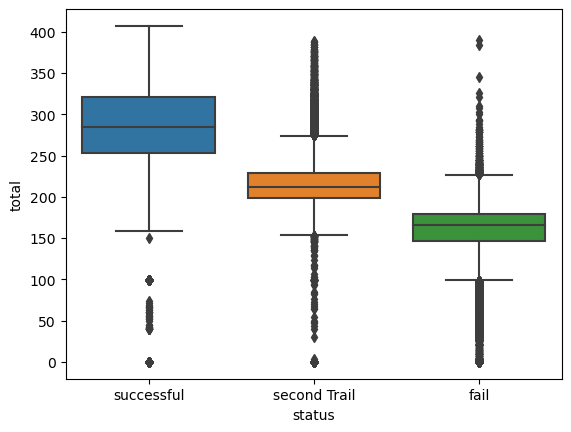

In [14]:
sns.boxplot(x=data1['status'],y=data1['total'])

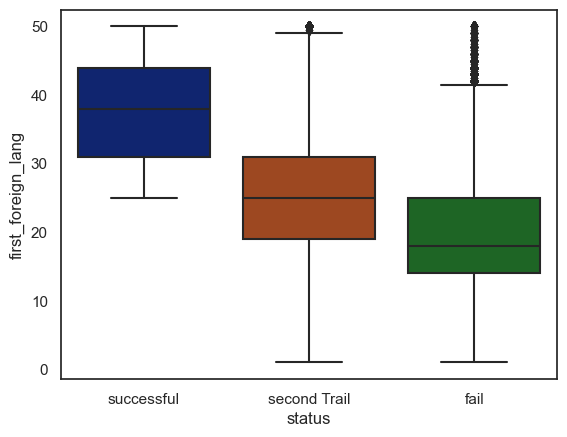

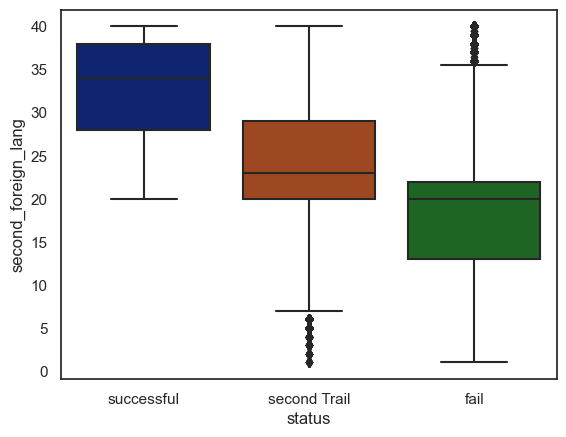

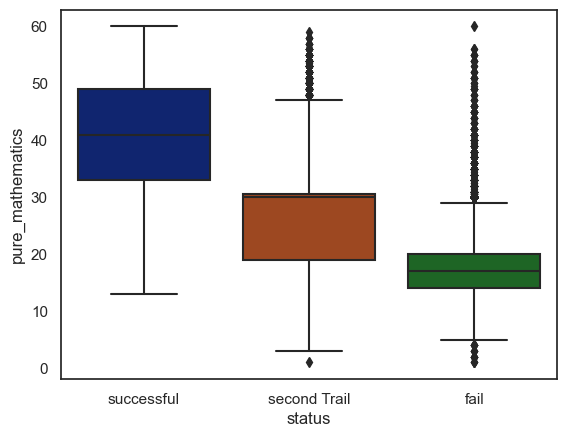

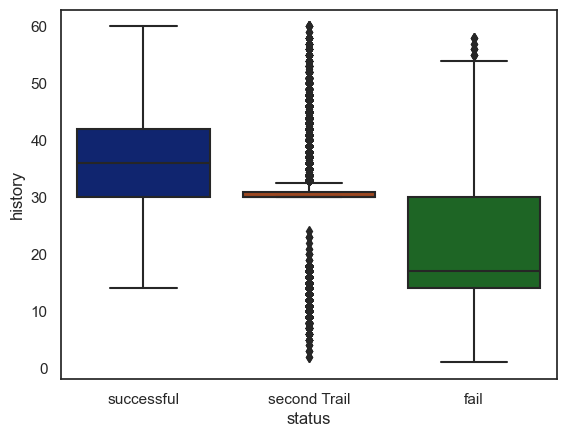

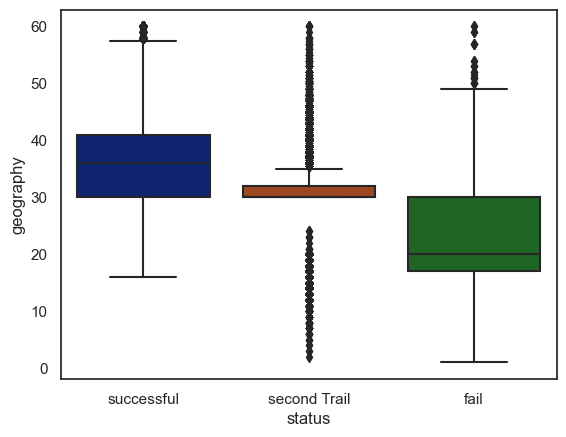

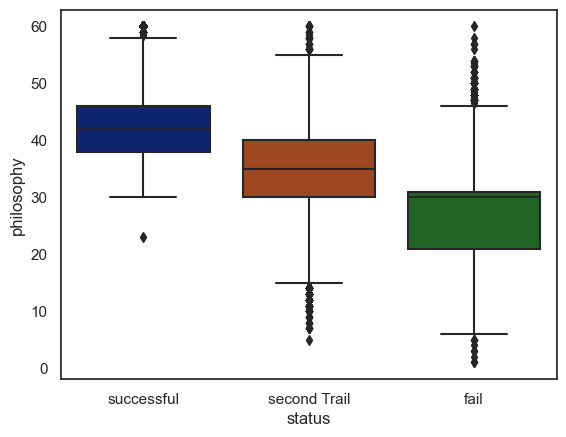

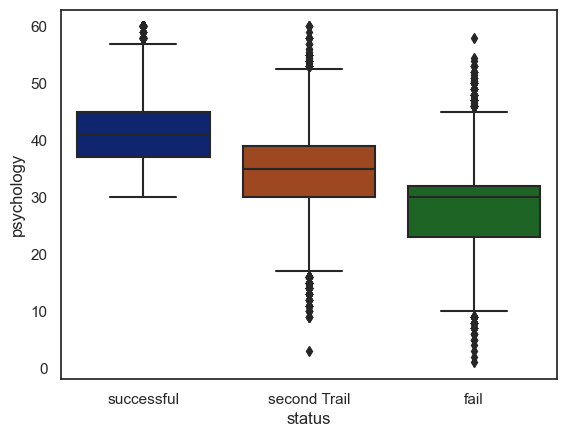

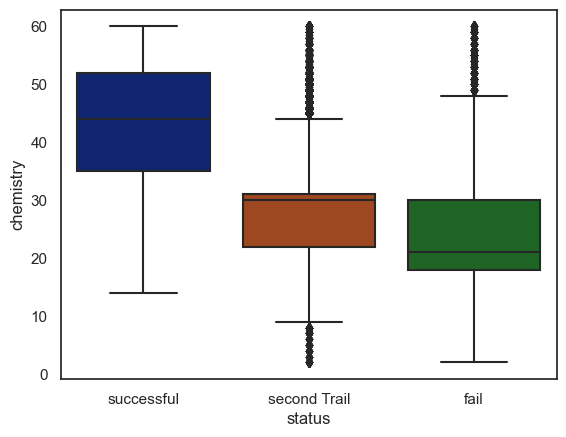

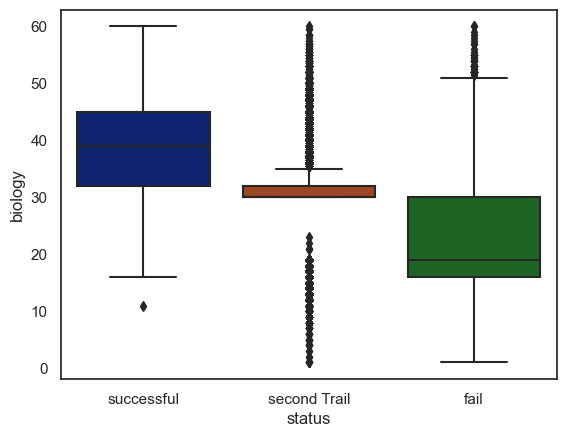

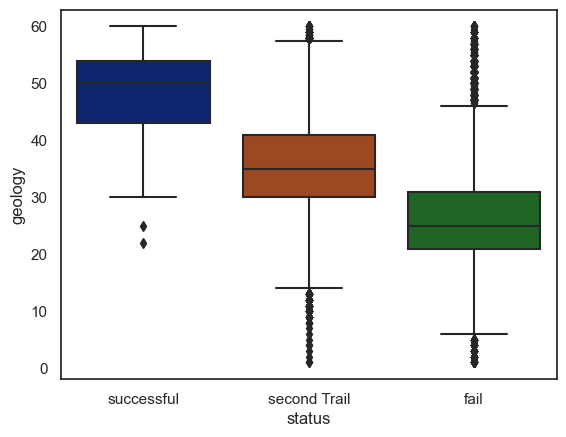

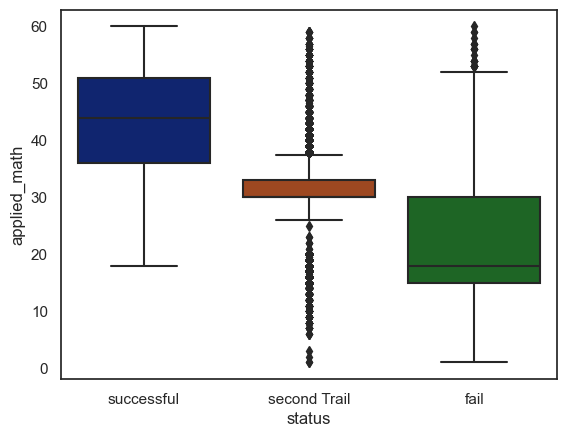

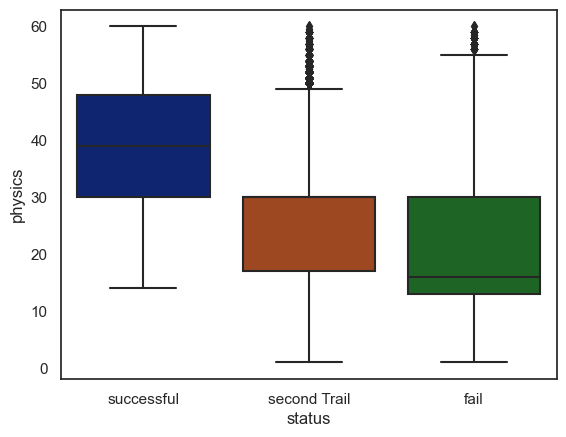

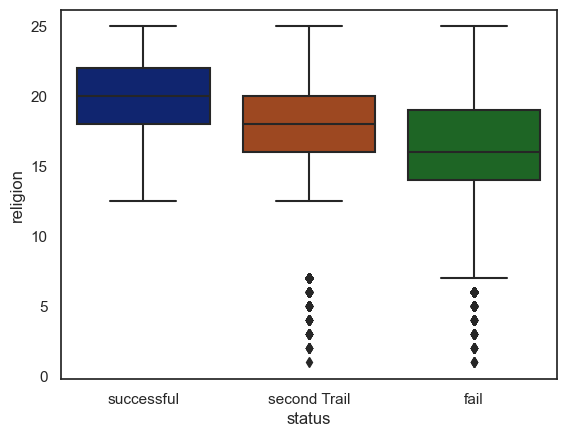

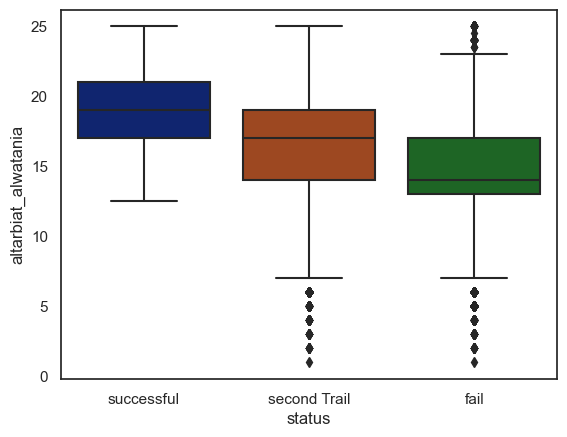

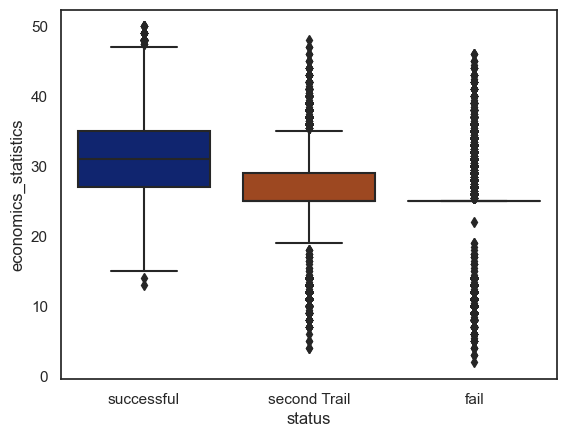

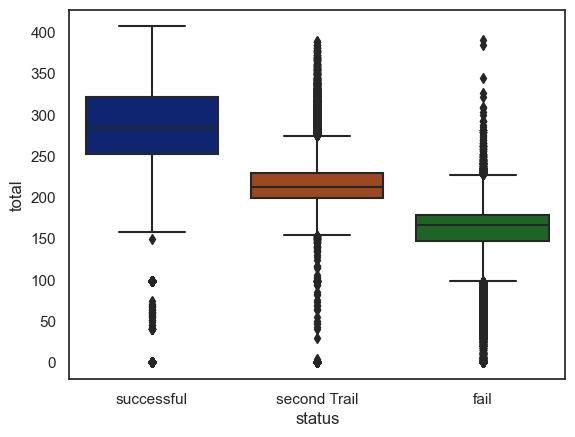

In [66]:
marks=['first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics',
       'religion', 'altarbiat_alwatania', 'economics_statistics', 'total']

#ax.plot(x, y)

for m in marks: 
    fig, ax = plt.subplots()
    ax=sns.boxplot(x=data1['status'],y=data1[m])


In [71]:
status_mean=pd.DataFrame()
for m in marks: 
    status_mean[m+' mean'] = data1.groupby(['status'])[m].mean()#.reset_index(name = 'Value').round(2)
status_mean

,first_foreign_lang mean,second_foreign_lang mean,pure_mathematics mean,history mean,geography mean,philosophy mean,psychology mean,chemistry mean,biology mean,geology mean,applied_math mean,physics mean,religion mean,altarbiat_alwatania mean,economics_statistics mean,total mean
status,,,,,,,,,,,,,,,,
fail,20.104066,18.642880,19.332172,20.598390,22.556106,26.953513,28.278056,22.227360,23.646985,26.927941,21.150051,18.855364,16.405768,15.033741,24.515657,158.993979
second Trail,26.118278,23.945547,27.541266,28.630343,29.804934,35.134231,35.092136,28.986152,30.196331,35.640697,30.353256,25.995329,17.787793,16.825805,26.880759,213.640159
successful,37.276302,32.490552,41.466440,37.262775,36.914287,41.830012,40.926806,43.526636,39.387934,48.091976,43.633892,40.405528,19.679586,19.146866,31.120481,281.962055


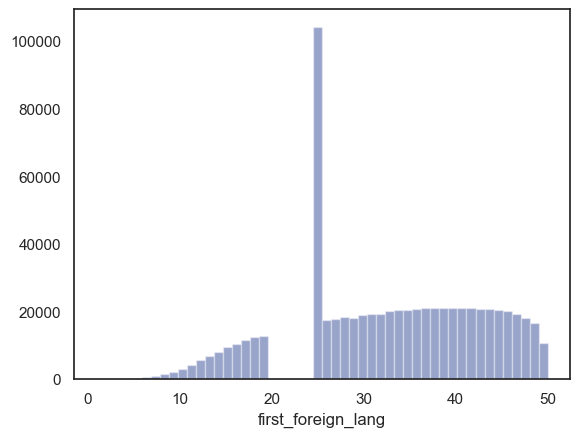

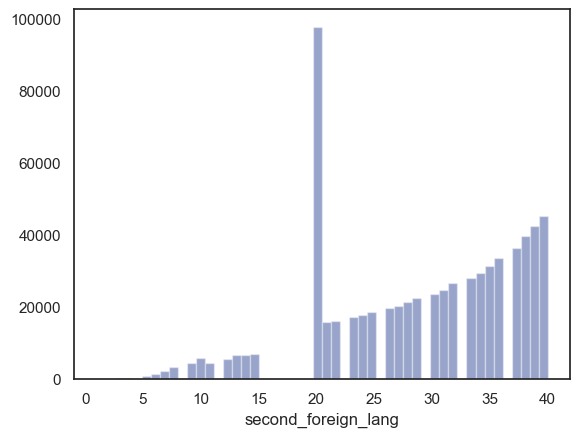

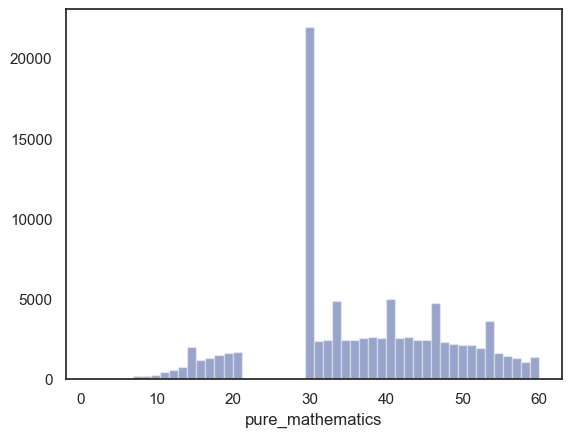

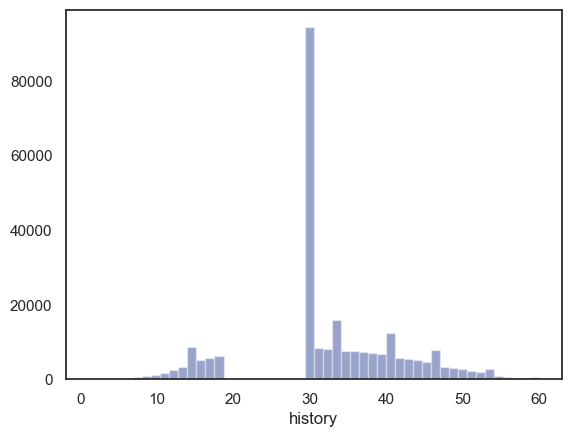

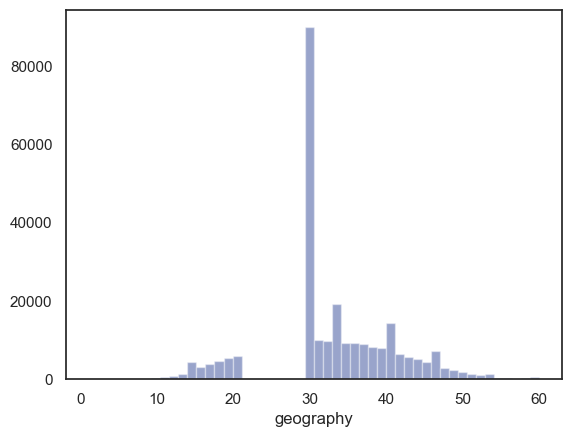

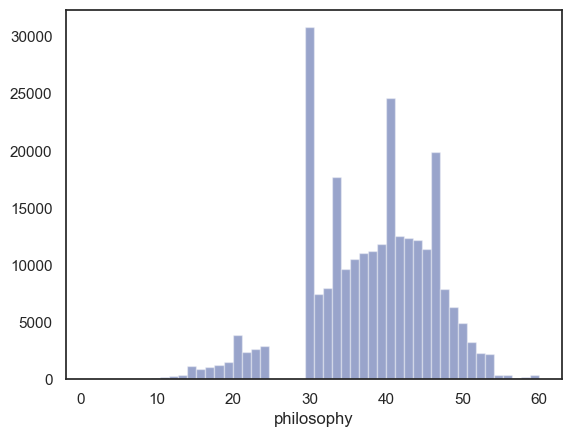

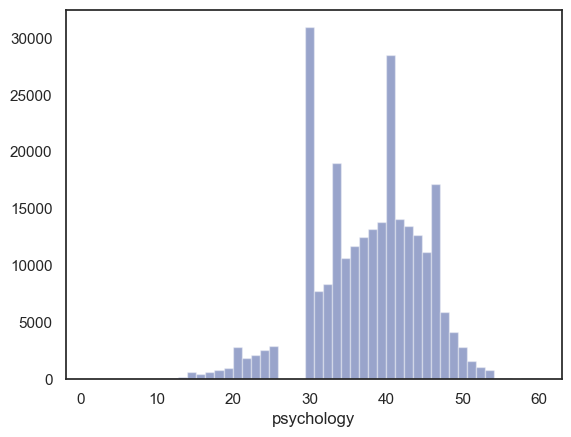

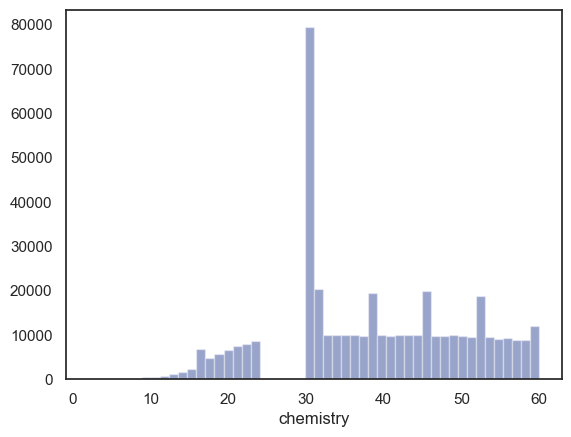

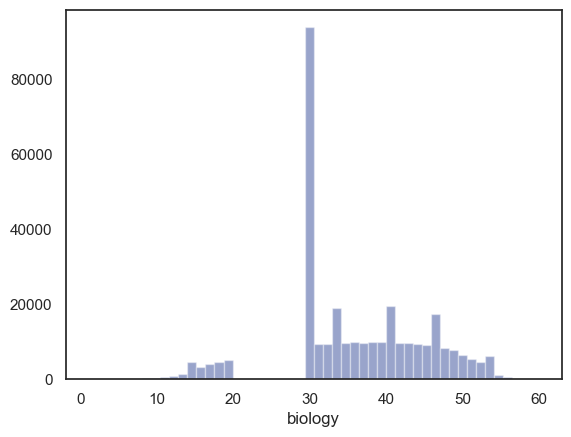

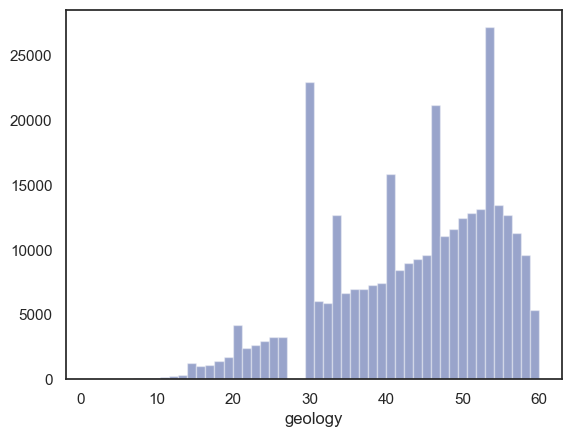

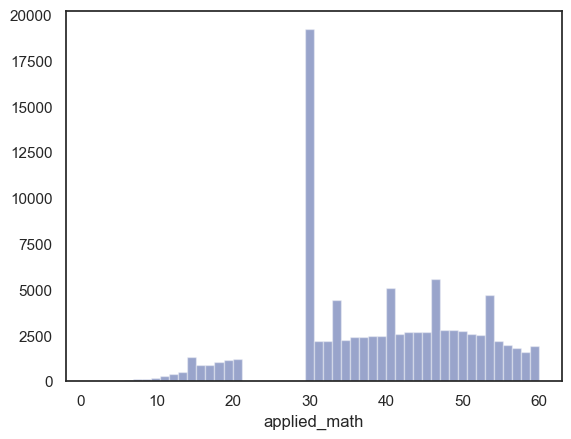

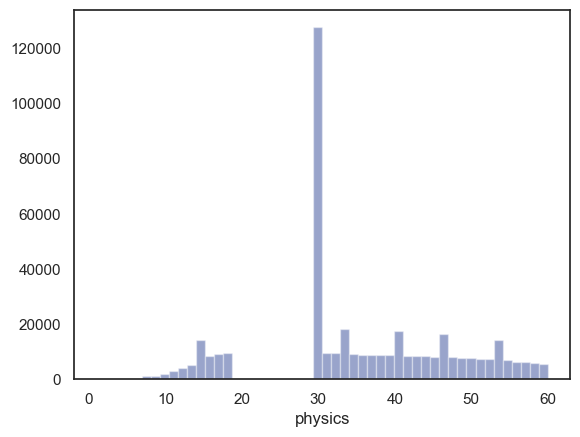

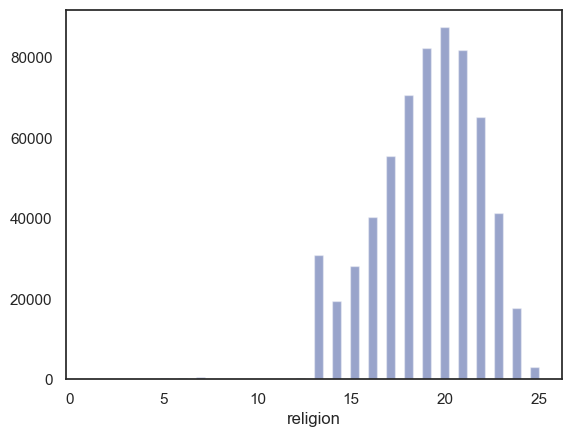

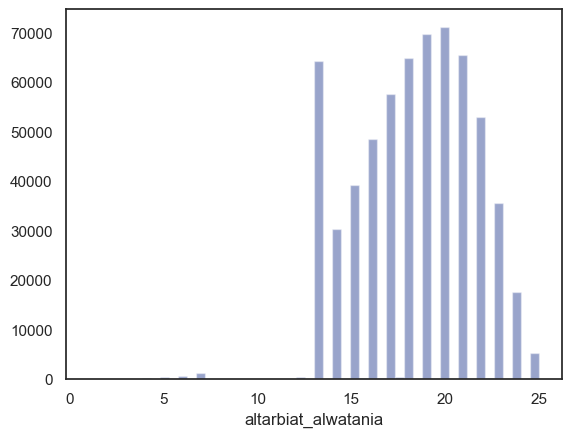

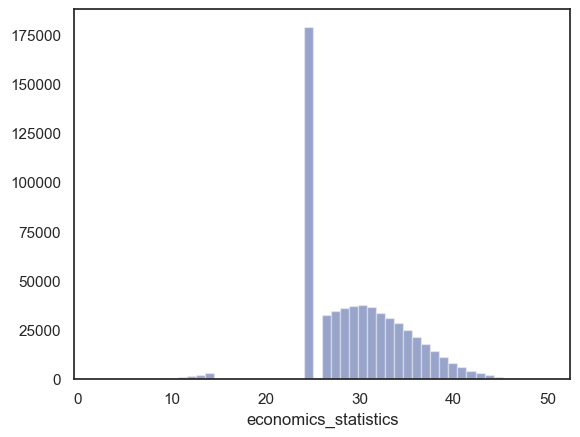

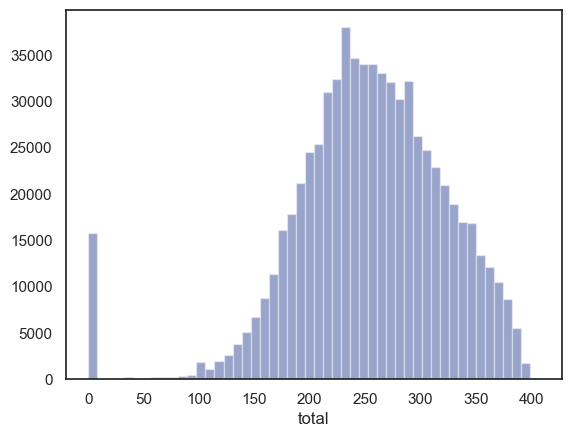

In [88]:
#sns.catplot(x='government_English', kind='bar', data=data1)
for m in marks: 
    fig, ax = plt.subplots()
    ax=sns.distplot(data1[m], kde = False)


Marks statistics and correlation values

In [56]:
marks_data = data2.loc[:,marks]
marks_data.describe()

,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,religion,altarbiat_alwatania,economics_statistics,total
count,677297.000000,676868.000000,96743.000000,258155.000000,258427.000000,258334.000000,258297.000000,418410.000000,322477.000000,322814.000000,96819.000000,417946.000000,626168.000000,626364.000000,610160.000000,698196.000000
mean,32.910567,29.051529,37.209286,32.774366,33.131060,38.104295,37.719668,38.687919,35.973941,43.466293,39.449684,35.585726,19.004238,18.308665,29.652033,253.148475
std,10.209730,8.289376,11.568998,9.712496,8.380363,8.076330,7.164803,11.819731,9.258400,10.714634,11.378084,12.147778,2.873635,3.238788,5.242760,71.103829
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,25.000000,22.000000,30.000000,30.000000,30.000000,32.000000,33.000000,30.000000,30.000000,36.000000,30.000000,30.000000,17.000000,16.000000,25.000000,214.000000
50%,33.000000,30.000000,37.000000,30.000000,31.000000,39.000000,38.000000,38.000000,35.000000,46.000000,40.000000,33.000000,19.000000,19.000000,29.000000,255.000000
75%,41.000000,36.000000,46.000000,39.000000,38.000000,44.000000,43.000000,49.000000,43.000000,52.000000,49.000000,45.000000,21.000000,21.000000,33.000000,301.000000
max,50.000000,40.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,25.000000,25.000000,50.000000,407.000000


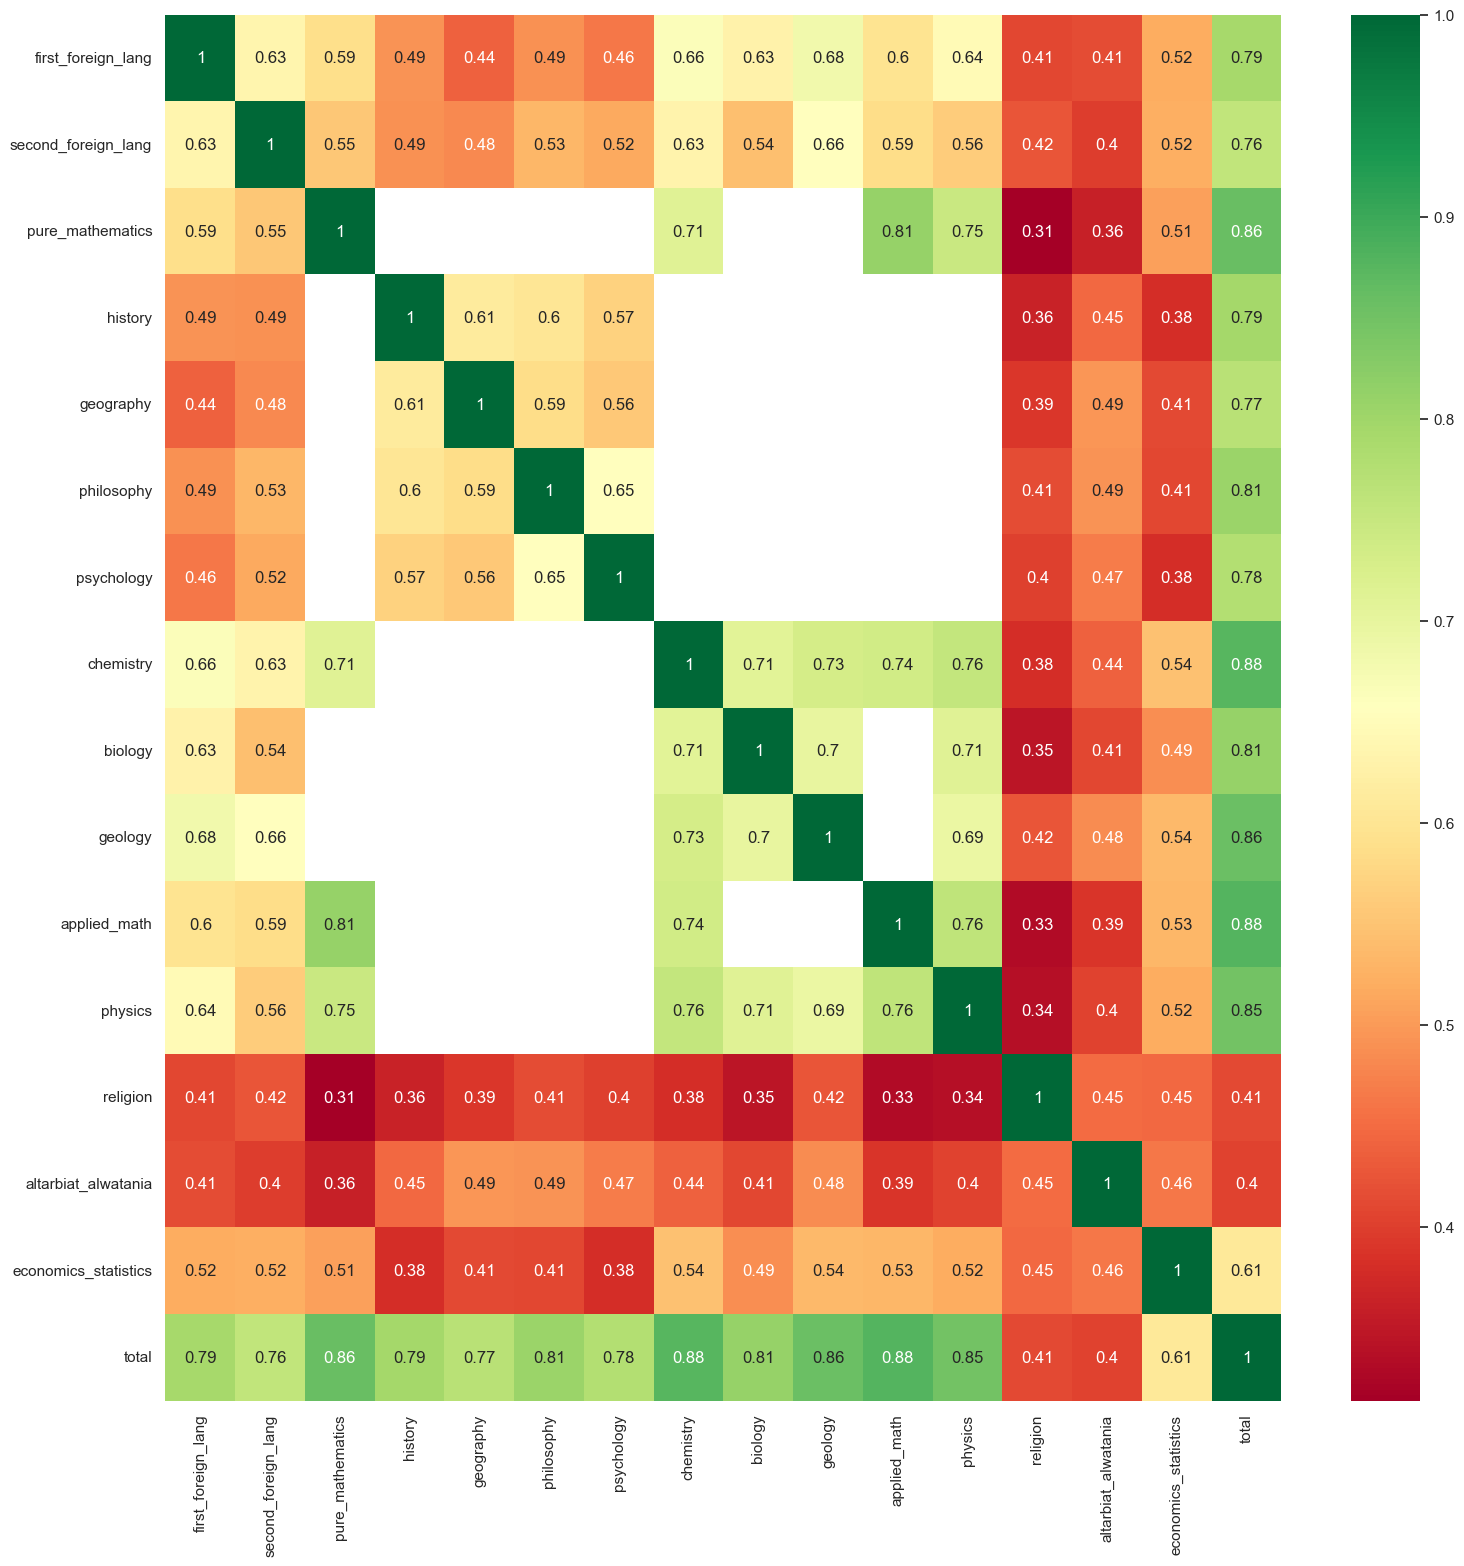

In [57]:
plt.figure(figsize=(18,18))
sns.heatmap(marks_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

Some analyses divided on location

In [111]:
top5 = data1.groupby('government_English').mean().sort_values(by = 'total', ascending = False)
top5.head()

,desk_no,Percentage,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
government_English,,,,,,,,,,,,,,,,,,,
North Sinai,777041.751420,NaN,53.841498,42.361208,32.753802,47.091463,38.071579,34.223158,40.307368,38.637895,45.676832,42.669355,49.388417,47.243902,44.638124,306.042744,18.941196,17.276641,29.680136
Dakahlia,699860.421384,NaN,54.977221,39.451662,33.496067,44.684756,37.122526,35.249008,41.759480,40.527754,45.194427,41.718445,49.177382,46.433450,42.346943,296.068045,20.125529,19.472186,32.291676
Port Said,770918.555928,NaN,55.051066,39.506371,32.627909,43.948598,38.297105,37.334975,43.593716,42.664208,42.968750,39.343267,48.107675,46.471963,40.887674,291.458002,20.093089,20.254968,32.721772
Damietta,634486.022318,NaN,54.272211,38.113259,32.762445,42.731303,36.973307,37.332808,42.672811,41.557982,42.682164,39.987919,47.690875,44.661817,40.345984,290.489313,20.194304,19.812677,32.543492
Gharbia,553798.191782,NaN,54.100834,36.314633,32.563990,42.212418,34.536350,34.848154,40.632136,40.203453,43.474982,38.250475,46.313642,44.888526,39.398329,283.168098,19.879984,19.519760,31.764541


<AxesSubplot:xlabel='government_English', ylabel='total'>

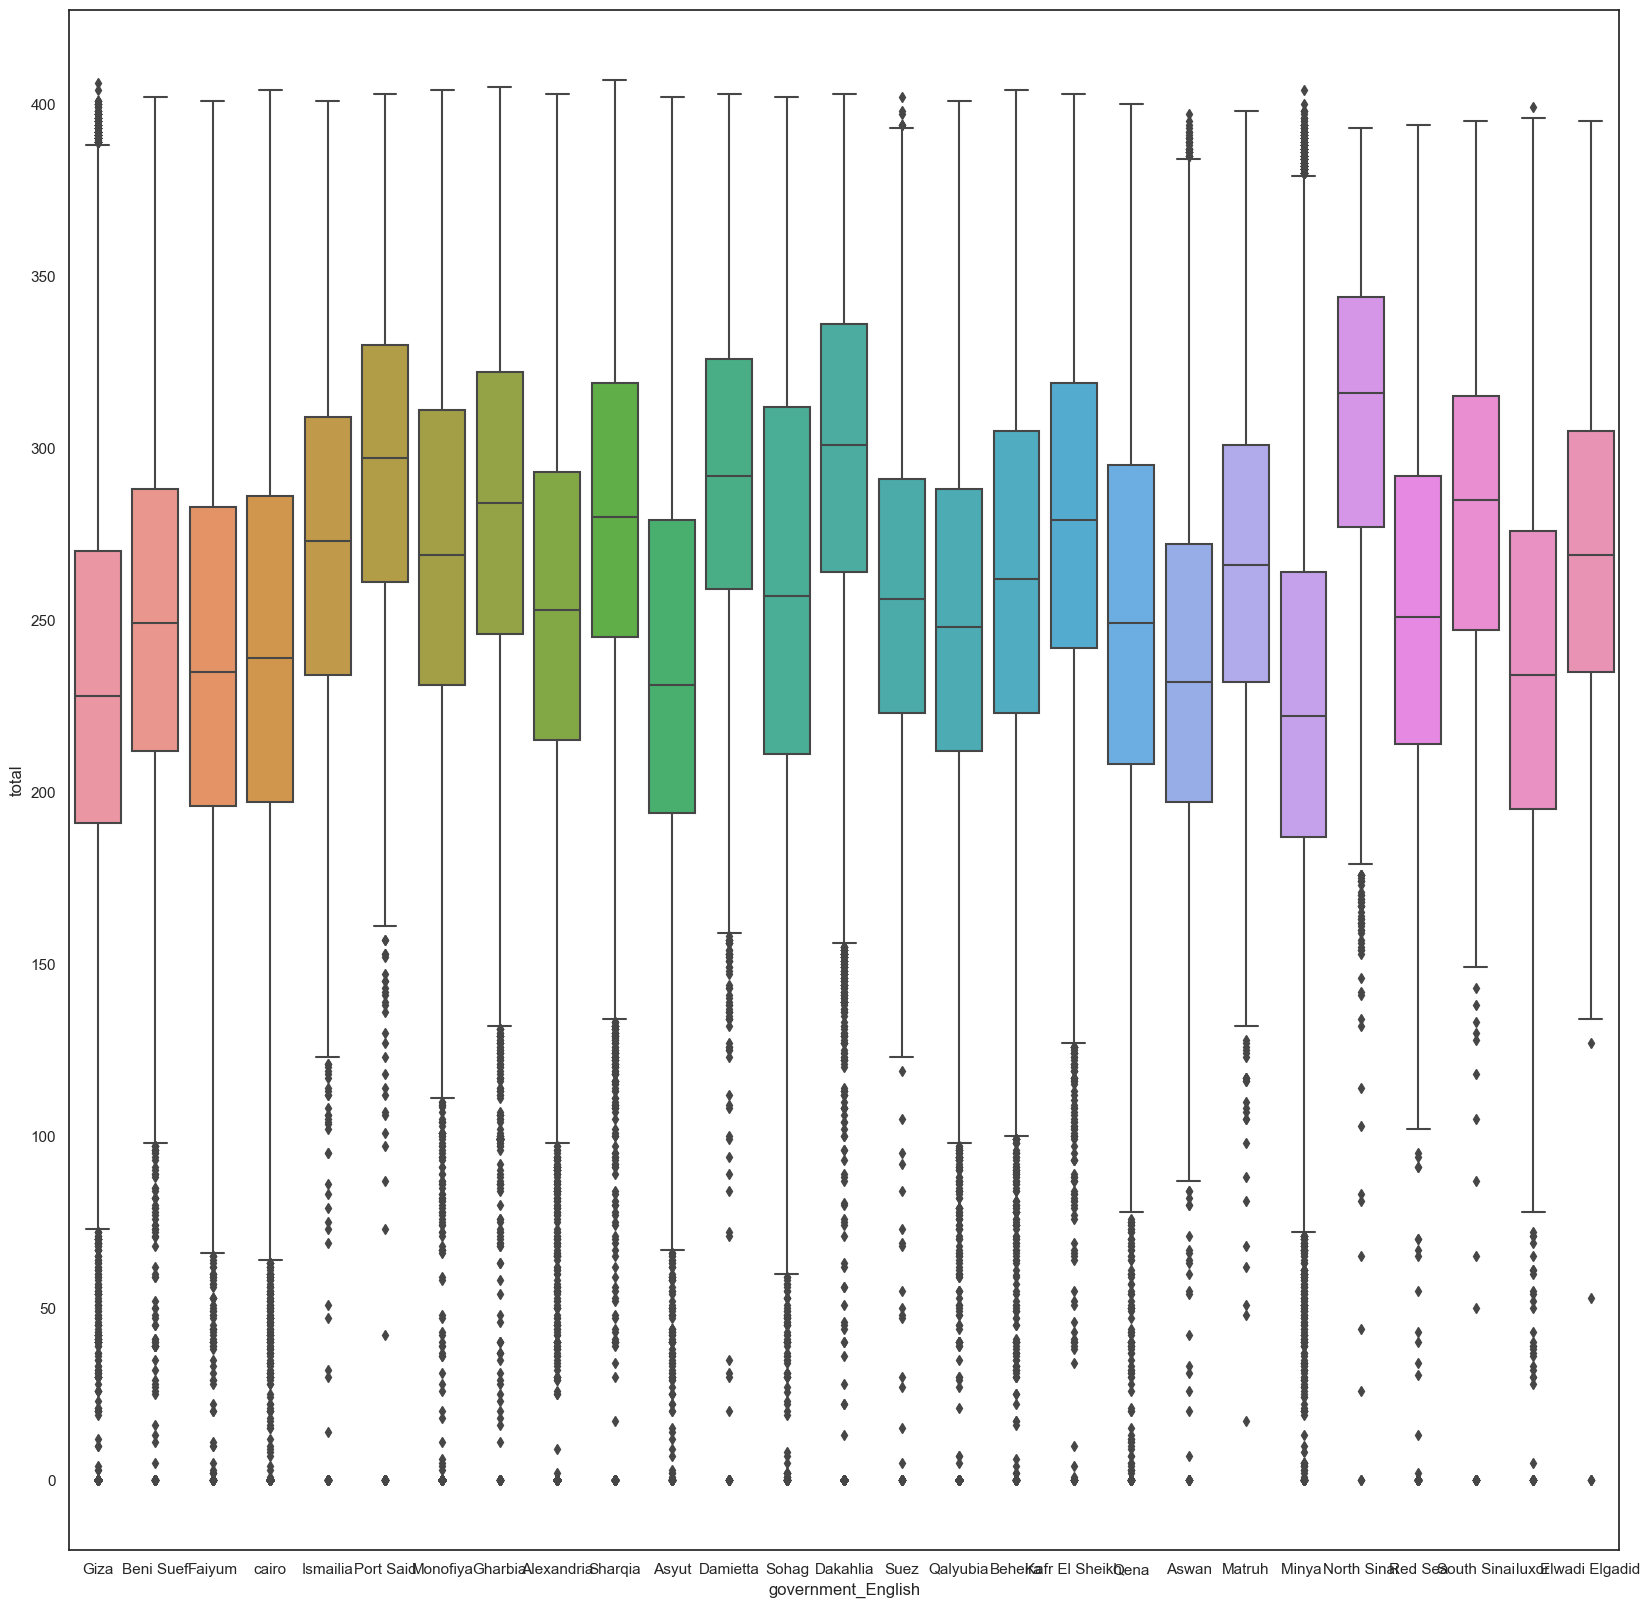

In [108]:
plt.figure(figsize=(20,20))
sns.boxplot(x=data1['government_English'],y=data1['total'])

In [113]:
top5.columns

Index(['desk_no', 'Percentage', 'arabic', 'first_foreign_lang',
       'second_foreign_lang', 'pure_mathematics', 'history', 'geography',
       'philosophy', 'psychology', 'chemistry', 'biology', 'geology',
       'applied_math', 'physics', 'total', 'religion', 'altarbiat_alwatania',
       'economics_statistics'],
      dtype='object')

Text(0.5, 1.0, 'Total Missing Values')

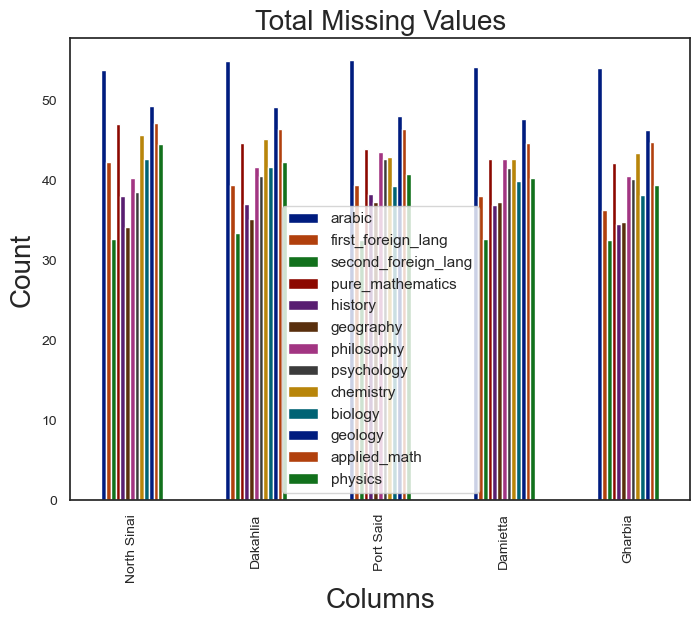

In [120]:
#total = data1.isnull().sum().sort_values(ascending=False)

total_select = top5.drop(columns=['desk_no', 'Percentage', 'total', 'religion', 'altarbiat_alwatania',
       'economics_statistics']).head(5)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)